In [13]:
import numpy as np
import pandas as pd
import utils

import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn.objects as so

In [2]:
fn = utils.path_data / 'ana_three_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'

In [3]:
df_ = df.copy()
df_ = df_[['group','participant', 'actual control', 'angular bias', 'accuracy', 'auc_pred_accuracy']]
df_ = df_.groupby(['group','participant', 'actual control', 'angular bias']).mean().reset_index()

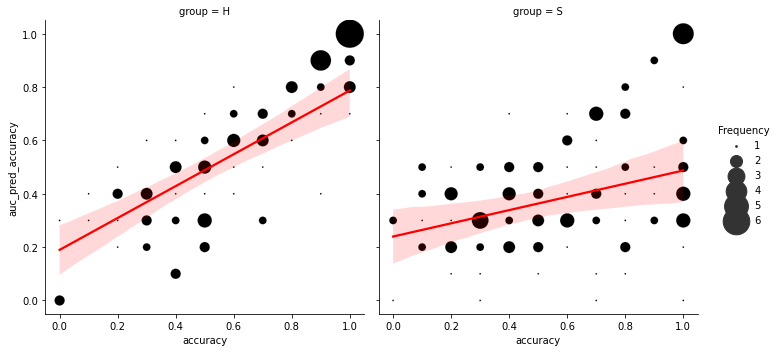

In [33]:
df_count = df_.value_counts(['group', 'accuracy', 'auc_pred_accuracy'])
# df_count.columns = ['count']
df_count = df_count.reset_index()
df_count.rename(columns={0:'Frequency'}, inplace=True)

# scaling 
df_count['Frequency'] = (df_count['Frequency'])**(1/2)

g = sns.relplot(data=df_count, x='accuracy', y='auc_pred_accuracy', 
                size='Frequency', color='k',
                sizes=(3, 800), col='group', height=5)
g.map(sns.regplot, 'accuracy', 'auc_pred_accuracy', color='red', scatter=False)
# sns.lmplot(data=df_count, x='accuracy', y='auc_pred_accuracy',  col='group', height=8, scatter_kws={'s':'count'})


In [34]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap


AttributeError: 'FacetGrid' object has no attribute 'reset_index'

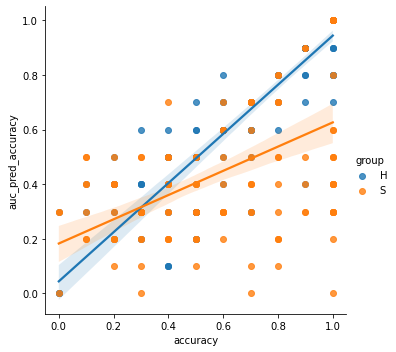

In [6]:
sns.lmplot(data=df_, x='accuracy', y='auc_pred_accuracy', hue='group', aspect=1).reset_index()
# plt.axis('equal')